In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import plotly.express as px
import plotly.io as pio

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">NYPD Shooting Incident Data</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">Group 26</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 20px;"> Guy Levy</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 20px;">Amit Elgazar</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 20px;">Rebecca Elhaj</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/undefined%20-%20Imgur.png?raw=true" width="900"/>
</div>

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">Introduction</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">This dataset contains a collection of data related to shooting incident that occurred in NYC at 2022.</h1>


In [2]:
url= "https://raw.githubusercontent.com/rebeccaelhaj/NYPD-Shooting-/main/NYPD_Shooting_Incident_Data__Year_To_Date_.csv"
url


'https://raw.githubusercontent.com/rebeccaelhaj/NYPD-Shooting-/main/NYPD_Shooting_Incident_Data__Year_To_Date_.csv'

In [3]:
df=pd.read_csv(url)

 
<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">Get to know our data:</h1>


In [7]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
0,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0,STREET,(null),Y,...,1020669,255027,40.866590,-73.868328,POINT (-73.86832754 40.86658962),5.0,22.0,32.0,11605.0,59.0
1,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0,STREET,(null),N,...,1008387,253290,40.861864,-73.912739,POINT (-73.91273918 40.86186421),5.0,29.0,34.0,11606.0,24.0
2,250216145,08/27/2022,00:21:00,BRONX,OUTSIDE,44,0,VEHICLE,(null),N,...,1008878,244480,40.837683,-73.910994,POINT (-73.910994 40.837683),5.0,42.0,27.0,10935.0,50.0
3,239207164,01/15/2022,19:50:00,QUEENS,OUTSIDE,113,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,1044794,188802,40.684689,-73.781699,POINT (-73.781699 40.684689),3.0,46.0,71.0,24669.0,41.0
4,248013313,07/14/2022,01:19:00,BROOKLYN,INSIDE,77,0,DWELLING,MULTI DWELL - APT BUILD,N,...,1002013,185752,40.676508,-73.935960,POINT (-73.93596 40.676508),2.0,49.0,49.0,17615.0,16.0


In [8]:
df.shape

(1716, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INCIDENT_KEY              1716 non-null   int64  
 1   OCCUR_DATE                1716 non-null   object 
 2   OCCUR_TIME                1716 non-null   object 
 3   BORO                      1716 non-null   object 
 4   LOC_OF_OCCUR_DESC         1716 non-null   object 
 5   PRECINCT                  1716 non-null   int64  
 6   JURISDICTION_CODE         1716 non-null   int64  
 7   LOC_CLASSFCTN_DESC        1716 non-null   object 
 8   LOCATION_DESC             1716 non-null   object 
 9   STATISTICAL_MURDER_FLAG   1716 non-null   object 
 10  PERP_AGE_GROUP            1716 non-null   object 
 11  PERP_SEX                  1716 non-null   object 
 12  PERP_RACE                 1716 non-null   object 
 13  VIC_AGE_GROUP             1716 non-null   object 
 14  VIC_SEX 

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">We noticed that in our data file the lack of data was listed with the value "(null)" We had to convert this value to a known value so Python could count the missing values for us. </h1>


In [10]:
df = df.replace(r'^\(null\)$', pd.NA, regex=True)
df = df.infer_objects()
df = df.where(pd.notna(df), None)
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
0,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0,STREET,None,Y,...,1020669,255027,40.866590,-73.868328,POINT (-73.86832754 40.86658962),5.0,22.0,32.0,11605.0,59.0
1,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0,STREET,None,N,...,1008387,253290,40.861864,-73.912739,POINT (-73.91273918 40.86186421),5.0,29.0,34.0,11606.0,24.0
2,250216145,08/27/2022,00:21:00,BRONX,OUTSIDE,44,0,VEHICLE,None,N,...,1008878,244480,40.837683,-73.910994,POINT (-73.910994 40.837683),5.0,42.0,27.0,10935.0,50.0
3,239207164,01/15/2022,19:50:00,QUEENS,OUTSIDE,113,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,1044794,188802,40.684689,-73.781699,POINT (-73.781699 40.684689),3.0,46.0,71.0,24669.0,41.0
4,248013313,07/14/2022,01:19:00,BROOKLYN,INSIDE,77,0,DWELLING,MULTI DWELL - APT BUILD,N,...,1002013,185752,40.676508,-73.935960,POINT (-73.93596 40.676508),2.0,49.0,49.0,17615.0,16.0


In [11]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts',
       'Zip Codes', 'Community Districts'],
      dtype='object')

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;">Column explanation:</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/WhatsApp%20Image%202024-02-25%20at%2010.51.33.jpeg?raw=true" width="1000"/>
</div>

In [12]:
df.dtypes

INCIDENT_KEY                  int64
OCCUR_DATE                   object
OCCUR_TIME                   object
BORO                         object
LOC_OF_OCCUR_DESC            object
PRECINCT                      int64
JURISDICTION_CODE             int64
LOC_CLASSFCTN_DESC           object
LOCATION_DESC                object
STATISTICAL_MURDER_FLAG      object
PERP_AGE_GROUP               object
PERP_SEX                     object
PERP_RACE                    object
VIC_AGE_GROUP                object
VIC_SEX                      object
VIC_RACE                     object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
Borough Boundaries          float64
City Council Districts      float64
Police Precincts            float64
Zip Codes                   float64
Community Districts         float64
dtype: object

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">Checking for any null data before we begin our analysis.</h1>

In [13]:
df.isnull().sum()

INCIDENT_KEY                  0
OCCUR_DATE                    0
OCCUR_TIME                    0
BORO                          0
LOC_OF_OCCUR_DESC             0
PRECINCT                      0
JURISDICTION_CODE             0
LOC_CLASSFCTN_DESC            0
LOCATION_DESC               977
STATISTICAL_MURDER_FLAG       0
PERP_AGE_GROUP              640
PERP_SEX                    640
PERP_RACE                   640
VIC_AGE_GROUP                 0
VIC_SEX                       0
VIC_RACE                      0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                     10
Longitude                    10
New Georeferenced Column     10
Borough Boundaries           10
City Council Districts       10
Police Precincts             10
Zip Codes                    14
Community Districts          10
dtype: int64

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">There are few missing values in columns.</h1>

In [14]:
name_nan = df[["Latitude","Longitude","New Georeferenced Column","Borough Boundaries","City Council Districts","Police Precincts","Zip Codes","Community Districts"]]
rows_with_nan = []
for index, row in name_nan.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
rows_with_nan

[87, 213, 234, 340, 582, 652, 674, 743, 1144, 1217, 1278, 1301, 1565, 1609]

In [15]:
df.iloc[[87, 213, 234, 340, 582, 652, 674, 743, 1144, 1217, 1278, 1301, 1565, 1609]]

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
87,251253188,09/18/2022,03:40:00,MANHATTAN,OUTSIDE,34,0,STREET,None,N,...,1002173,249401,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
213,247044938,06/22/2022,20:22:00,BRONX,INSIDE,48,0,COMMERCIAL,GROCERY/BODEGA,N,...,1013088,247729,40.846588,-73.895768,POINT (-73.895768 40.846588),5.0,22.0,31.0,NaN,35.0
234,254053457,11/13/2022,01:00:00,QUEENS,OUTSIDE,110,0,PLAYGROUND,None,N,...,1019164,210169,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
340,252281471,10/09/2022,19:15:00,BROOKLYN,OUTSIDE,61,0,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,995122,155693,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
582,246530275,06/11/2022,03:23:00,BRONX,OUTSIDE,48,0,PLAYGROUND,None,Y,...,1013401,246752,40.843904,-73.894641,POINT (-73.89464086 40.84390423),5.0,43.0,31.0,NaN,35.0
652,248501023,07/25/2022,03:25:00,BROOKLYN,OUTSIDE,60,0,STREET,None,N,...,983135,150942,40.580977,-74.004014,POINT (-74.00401402 40.58097687),2.0,45.0,35.0,NaN,21.0
674,251690448,09/27/2022,23:30:00,MANHATTAN,OUTSIDE,28,0,STREET,None,N,...,997407,233806,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
743,250584475,09/03/2022,22:45:00,BROOKLYN,OUTSIDE,90,0,STREET,None,N,...,998002,196692,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1144,251690448,09/27/2022,23:30:00,MANHATTAN,OUTSIDE,28,0,STREET,None,N,...,997407,233806,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1217,255042633,12/03/2022,10:21:00,MANHATTAN,OUTSIDE,33,0,STREET,None,N,...,1001891,245600,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


In [16]:
df.shape

(1716, 26)

In [17]:
df.dropna(subset=["Latitude", "Longitude", "New Georeferenced Column", "Borough Boundaries", "City Council Districts", "Police Precincts", "Zip Codes", "Community Districts"], inplace=True)
df.shape

(1702, 26)

<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">We have observed that in non-murder cases, often there is no perpetrator identified. This could be due to various reasons, such as suicide or lack of conviction. Since we cannot definitively determine the reason, we have opted to exclude these entries and concentrate on cases involving a perpetrator.</h1>

In [18]:
for index, row in df.iterrows():
    if row['STATISTICAL_MURDER_FLAG'] == 'N' and (row['PERP_AGE_GROUP'] is None and row['PERP_SEX'] is None and row['PERP_RACE'] is None):
        df.drop(index, inplace=True)

In [19]:
df.shape

(1163, 26)

In [20]:
df.isnull().sum()

INCIDENT_KEY                  0
OCCUR_DATE                    0
OCCUR_TIME                    0
BORO                          0
LOC_OF_OCCUR_DESC             0
PRECINCT                      0
JURISDICTION_CODE             0
LOC_CLASSFCTN_DESC            0
LOCATION_DESC               658
STATISTICAL_MURDER_FLAG       0
PERP_AGE_GROUP               94
PERP_SEX                     94
PERP_RACE                    94
VIC_AGE_GROUP                 0
VIC_SEX                       0
VIC_RACE                      0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
Borough Boundaries            0
City Council Districts        0
Police Precincts              0
Zip Codes                     0
Community Districts           0
dtype: int64

<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">There are a large number of none in LOCATION_DESC's column, so in order to work on the data file, we replaced these values with the other values in the same column evenly so as not to damage the file.</h1>

In [21]:
for column in df.columns:
    values = df["LOCATION_DESC"][df["LOCATION_DESC"].notna()]
    if not values.empty:
        replacement_value = values.iloc[0]
        df["LOCATION_DESC"] = df["LOCATION_DESC"].fillna(replacement_value)

In [22]:
df.isnull().sum()

INCIDENT_KEY                 0
OCCUR_DATE                   0
OCCUR_TIME                   0
BORO                         0
LOC_OF_OCCUR_DESC            0
PRECINCT                     0
JURISDICTION_CODE            0
LOC_CLASSFCTN_DESC           0
LOCATION_DESC                0
STATISTICAL_MURDER_FLAG      0
PERP_AGE_GROUP              94
PERP_SEX                    94
PERP_RACE                   94
VIC_AGE_GROUP                0
VIC_SEX                      0
VIC_RACE                     0
X_COORD_CD                   0
Y_COORD_CD                   0
Latitude                     0
Longitude                    0
New Georeferenced Column     0
Borough Boundaries           0
City Council Districts       0
Police Precincts             0
Zip Codes                    0
Community Districts          0
dtype: int64


<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">A small number of missing values remained in these columns, we omitted them as well.</h1>

In [23]:
df.dropna(subset=["PERP_SEX","PERP_RACE","PERP_AGE_GROUP"], inplace=True)
df.shape

(1069, 26)

In [24]:
df.isnull().sum()

INCIDENT_KEY                0
OCCUR_DATE                  0
OCCUR_TIME                  0
BORO                        0
LOC_OF_OCCUR_DESC           0
PRECINCT                    0
JURISDICTION_CODE           0
LOC_CLASSFCTN_DESC          0
LOCATION_DESC               0
STATISTICAL_MURDER_FLAG     0
PERP_AGE_GROUP              0
PERP_SEX                    0
PERP_RACE                   0
VIC_AGE_GROUP               0
VIC_SEX                     0
VIC_RACE                    0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
Borough Boundaries          0
City Council Districts      0
Police Precincts            0
Zip Codes                   0
Community Districts         0
dtype: int64

In [25]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
0,243566884,04/12/2022,22:08:00,BRONX,OUTSIDE,49,0,STREET,MULTI DWELL - PUBLIC HOUS,Y,...,1020669,255027,40.866590,-73.868328,POINT (-73.86832754 40.86658962),5.0,22.0,32.0,11605.0,59.0
1,256484816,12/17/2022,04:08:00,BRONX,OUTSIDE,52,0,STREET,MULTI DWELL - PUBLIC HOUS,N,...,1008387,253290,40.861864,-73.912739,POINT (-73.91273918 40.86186421),5.0,29.0,34.0,11606.0,24.0
6,251813843,09/29/2022,21:32:00,BROOKLYN,OUTSIDE,81,0,STREET,MULTI DWELL - PUBLIC HOUS,N,...,1004140,191775,40.693035,-73.928275,POINT (-73.928275 40.693035),2.0,30.0,53.0,18181.0,42.0
8,252647537,10/16/2022,20:05:00,BROOKLYN,OUTSIDE,75,0,STREET,MULTI DWELL - PUBLIC HOUS,Y,...,1014192,182173,40.666649,-73.892068,POINT (-73.892068 40.666649),2.0,25.0,47.0,17214.0,45.0
9,249207672,08/08/2022,04:20:00,MANHATTAN,OUTSIDE,20,0,STREET,MULTI DWELL - PUBLIC HOUS,N,...,989132,222591,40.777638,-73.982369,POINT (-73.982369 40.777638),4.0,19.0,12.0,12420.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,245173597,05/16/2022,16:50:00,BRONX,OUTSIDE,41,0,STREET,BEAUTY/NAIL SALON,Y,...,1012932,238907,40.822374,-73.896369,POINT (-73.896369 40.822374),5.0,43.0,24.0,10937.0,8.0
1712,239583450,01/22/2022,13:15:00,MANHATTAN,OUTSIDE,30,0,STREET,MULTI DWELL - PUBLIC HOUS,N,...,997458,240485,40.826743,-73.952273,POINT (-73.952273 40.826743),4.0,23.0,19.0,12428.0,37.0
1713,246825728,06/18/2022,03:29:00,MANHATTAN,OUTSIDE,32,0,STREET,MULTI DWELL - PUBLIC HOUS,N,...,1000999,234464,40.810209,-73.939496,POINT (-73.9394955 40.81020941),4.0,36.0,20.0,13095.0,18.0
1714,246876579,06/19/2022,20:08:00,BRONX,INSIDE,46,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,1012980,251028,40.855644,-73.896141,POINT (-73.896141 40.855644),5.0,22.0,29.0,10935.0,6.0


<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">there are no null values in the Dataframe.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">In which city did the most deaths occur?</h1>

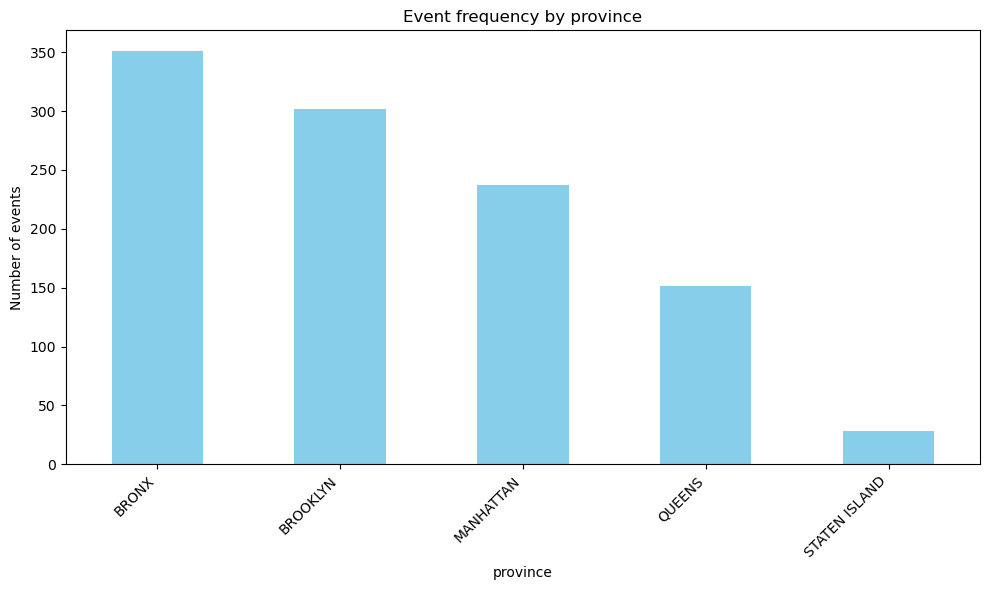

In [26]:
boro_counts = df['BORO'].value_counts()
plt.figure(figsize=(10, 6))
boro_counts.plot(kind='bar', color='skyblue')
plt.title('Event frequency by province')
plt.xlabel('province')
plt.ylabel('Number of events')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">We can see from the graph that Bronx and the Brooklyn have the highest number of deaths.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">In which city did the most murders occur?</h1>

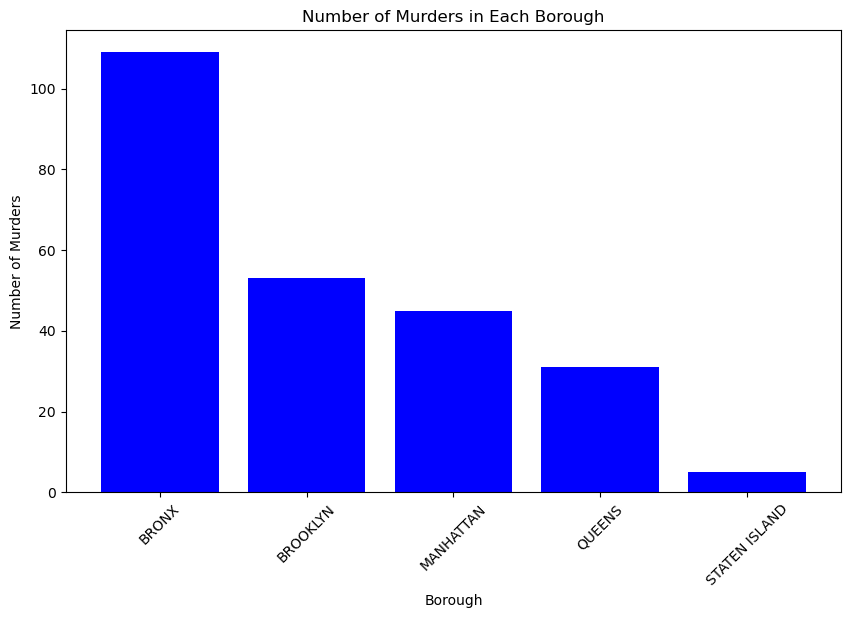

In [27]:
import matplotlib.pyplot as plt
murders_by_boro = df[df['STATISTICAL_MURDER_FLAG'] == 'Y'].groupby('BORO').size()
plt.figure(figsize=(10, 6))
plt.bar(murders_by_boro.index, murders_by_boro.values, color='blue')
plt.xlabel('Borough')
plt.ylabel('Number of Murders')
plt.title('Number of Murders in Each Borough')
plt.xticks(rotation=45)  
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">We can see from the graph that the Bronx city has the most murder cases.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">How many police stations are there in each city?</h1>

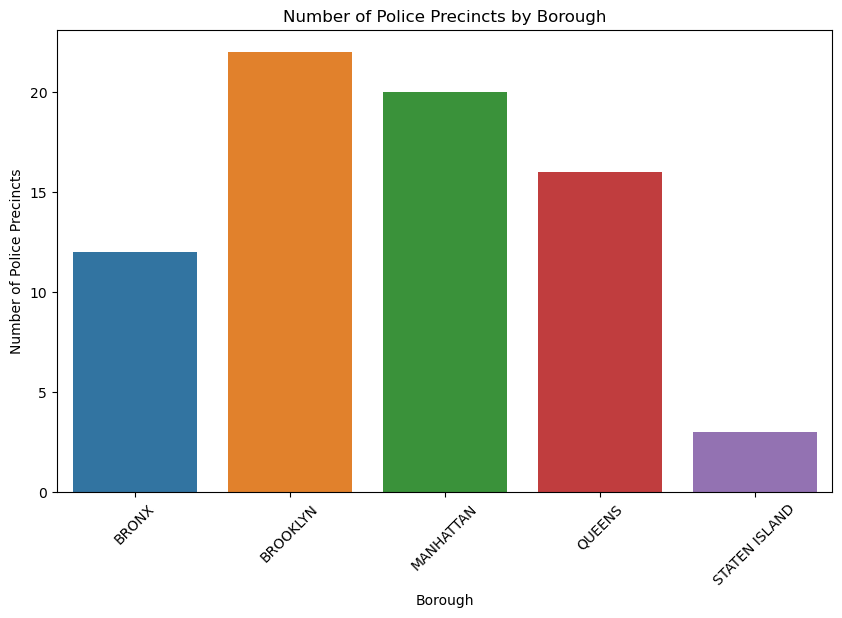

In [28]:
df_precincts = df[['BORO','PRECINCT']]
precincts_by_boro = df_precincts.groupby('BORO')['PRECINCT'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='BORO', y='PRECINCT', data=precincts_by_boro)
plt.title('Number of Police Precincts by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Police Precincts')
plt.xticks(rotation=45)  
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 20px;">we can see that the largest number of police stations is in Brooklyn, which is relatively surprising because we saw earlier that Brooklyn is the second district in terms of the number of shootings by a small margin compared to the Bronx, which is the most courted with the most incidents.</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/photo1708956915.jpeg?raw=true" " width=700"/>
<div/>

<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Here we checked using MAPBOX where the events were geographically.</h1>

In [29]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', zoom=10)
fig.update_layout(mapbox_style="open-street-map")
pio.renderers.default = "browser"
fig.show()


<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;"> And now we are showing through MAPBOX the location of the stations in relation to events in Brooklyn in particular.</h1>

In [30]:
fig = px.scatter_mapbox(df[df['BORO'] == 'BROOKLYN'], 
                        lat='Latitude', lon='Longitude', zoom=10, center={'lat': 40.6782, 'lon': -73.9442})
fig.update_layout(mapbox_style="open-street-map")
coordinates = [(40.5767312481655, -73.97606215233439),(40.59430686062415, -73.96046128117098), (40.60271356168131, -74.00314552535058),(40.62815121029836, -73.94154485418758),(40.62587583047404, -73.9913604388442),(40.64878455493557, -73.95023489651693),(40.63915203943862, -74.02260113884469),(40.64864991510982, -73.90500215418858),(40.630491976816685, -73.97366029466517),(40.6647223828129, -73.94781946768177),(40.65849248989311, -74.0008515676815),(40.671038245382846, -73.91359028302539),(40.67136963172555, -73.88153263884627),(40.683992188666025, -74.00020123884678),(40.67481151107865, -73.93017712350303),(40.68106795957585, -73.97436884069755),(40.689016741138694, -73.94466612350365),(40.68985197983596, -73.9244118811754),(40.69833445601492, -73.91781963884746),(40.695800238639634, -73.98294908302654),(40.69028566798946, -73.96040143884711),(40.7063787020426, -73.95074773884787),(40.72681369214486, -73.95325218117706)]
fig.add_scattermapbox(lat=[coord[0] for coord in coordinates],
                       lon=[coord[1] for coord in coordinates],
                       mode='markers',
                       marker=dict(color='red', size=10),
                       name='External Points')
fig.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;"> Conclusion:</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 20px;">  It can be seen from the map that we presented that in areas with a large number of incidents, the concentration of police stations is the largest, which contradicts common sense, which says that where there is a large number of police stations, the number of crime incidents and shootings in particular will be smaller, so it can be concluded that there is no connection between the number of police stations and the shooting incidentsr.</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/maxresdefault.jpg?raw=true" width="900"/>
</div>

 <h1 style="font-family:'Georgia', sans-serif; font-size:45px;">We want to examine the profile of the accused to identify possible patterns.</h1>


 <h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">The graph depicting the race of shooter in the Bronx district. </h1>

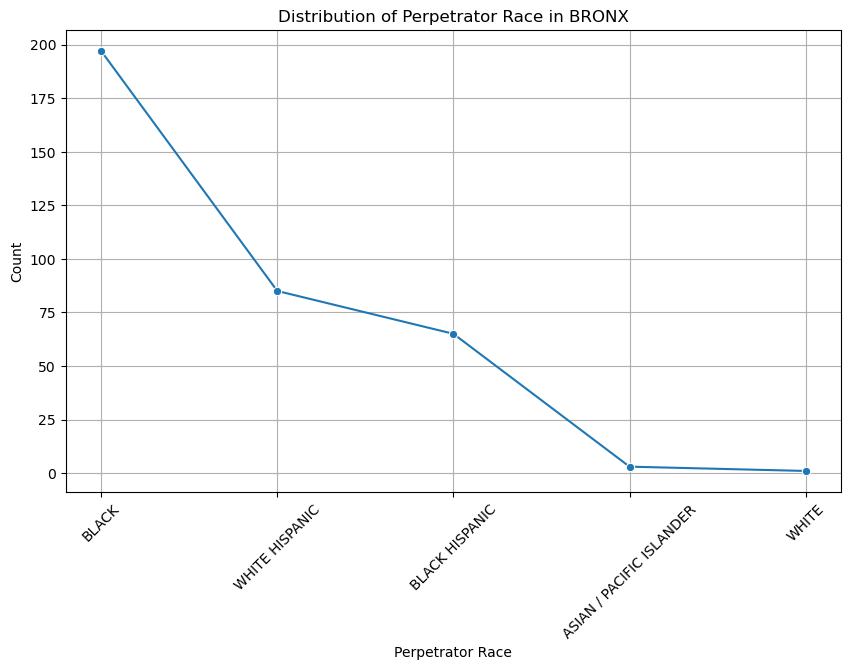

In [34]:
borough_df = df[df['BORO'] == 'BRONX']
race_counts = borough_df['PERP_RACE'].value_counts()
plt.figure(figsize=(10, 6))
sns.lineplot(x=race_counts.index, y=race_counts.values, marker='o')
plt.title('Distribution of Perpetrator Race in BRONX')
plt.xlabel('Perpetrator Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">The graph illustrating the gender of the shooter in the Bronx district. </h1>

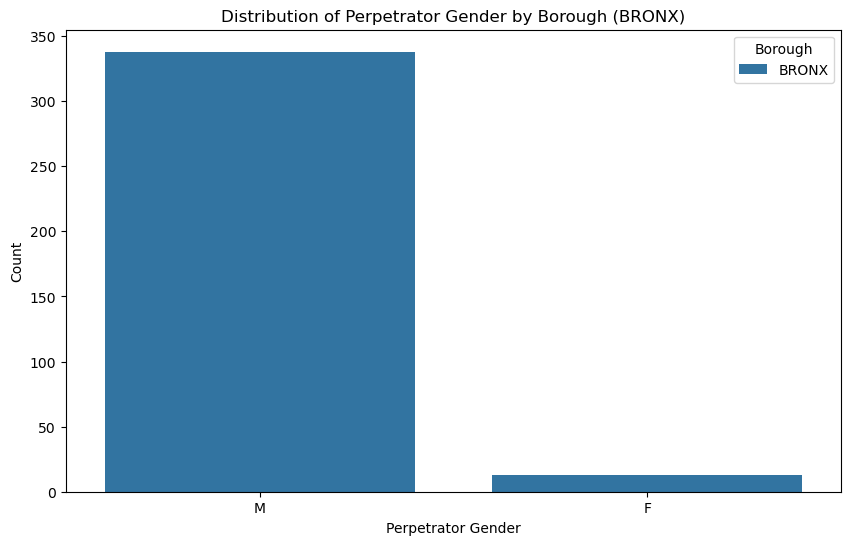

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PERP_SEX', hue='BORO', data=df[df['BORO'] == 'BRONX'])
plt.title('Distribution of Perpetrator Gender by Borough (BRONX)')
plt.xlabel('Perpetrator Gender')
plt.ylabel('Count')
plt.legend(title='Borough')
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">The graph depicting the age of murderers in the Bronx district. </h1>

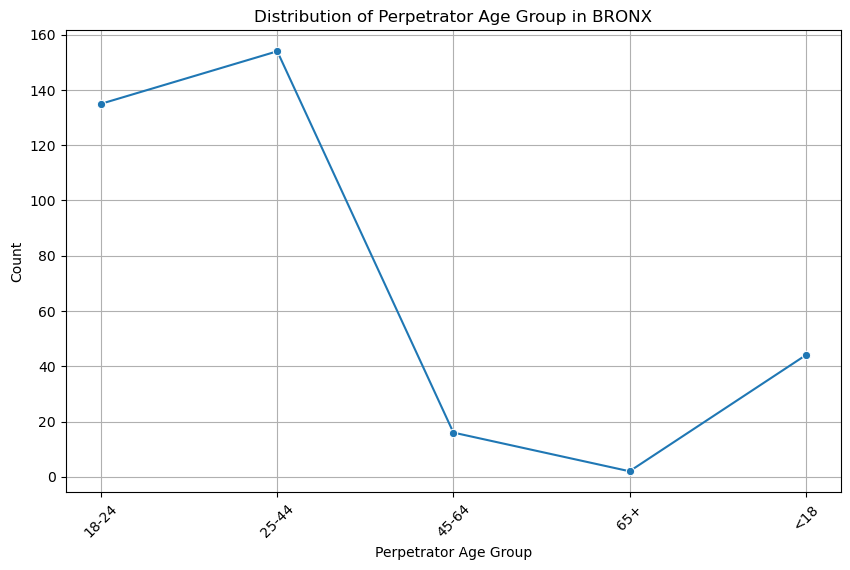

In [41]:
borough_df = df[df['BORO'] == 'BRONX']
age_group_counts = borough_df['PERP_AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_group_counts.index, y=age_group_counts.values, marker='o')
plt.title('Distribution of Perpetrator Age Group in BRONX')
plt.xlabel('Perpetrator Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">The graphs describing where the shooting incidents occurred. </h1>

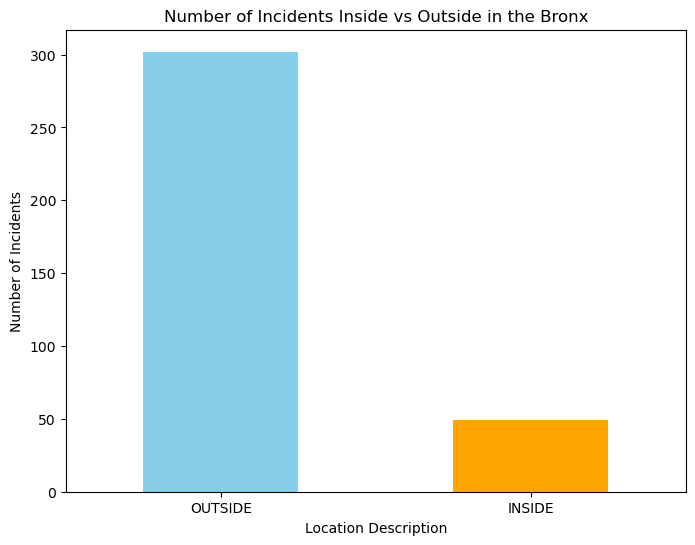

In [37]:
bronx_data = df[df['BORO'] == 'BRONX']
location_counts_bronx = bronx_data['LOC_OF_OCCUR_DESC'].value_counts()
plt.figure(figsize=(8, 6))
location_counts_bronx.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Incidents Inside vs Outside in the Bronx')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

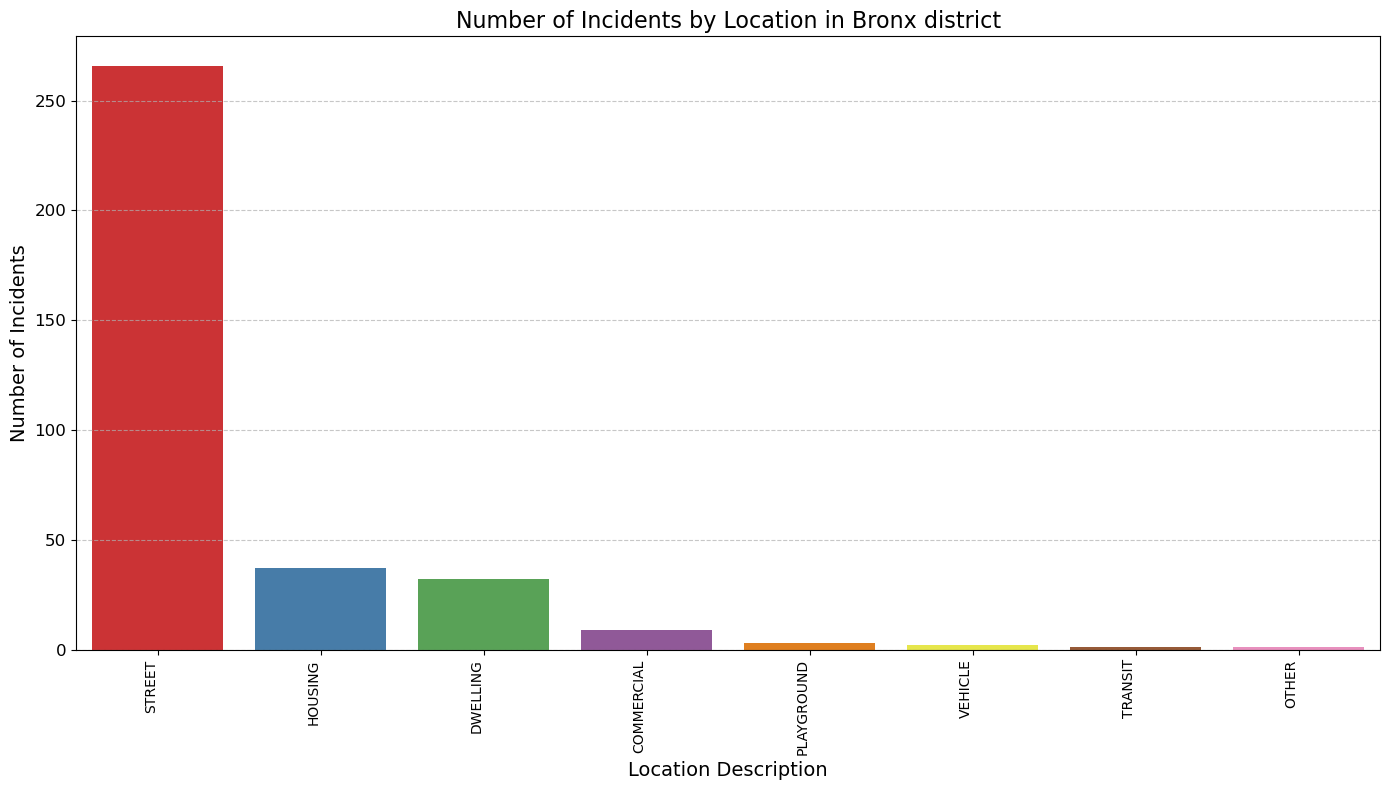

In [38]:
bronx_data = df[df['BORO'] == 'BRONX']
plt.figure(figsize=(14, 8))
sns.countplot(x='LOC_CLASSFCTN_DESC', data=bronx_data, palette='Set1', order=bronx_data['LOC_CLASSFCTN_DESC'].value_counts().index)
plt.title('Number of Incidents by Location in Bronx district', fontsize=16)
plt.xlabel('Location Description', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 <h1 style="font-family:'Georgia', sans-serif; font-size:45px;">We want to examine the profile of the victim to identify possible patterns.</h1>

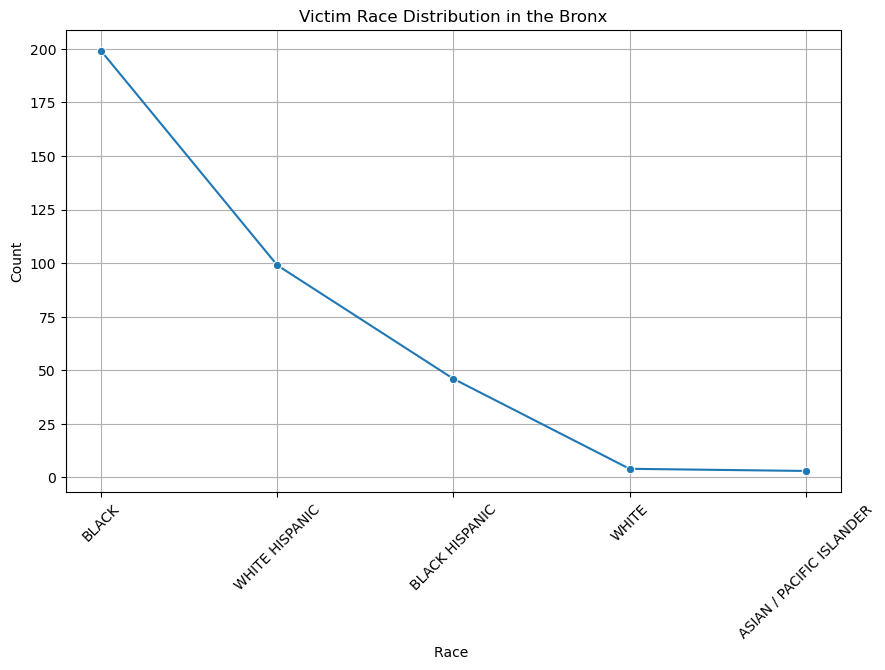

In [39]:
borough_df = df[df['BORO'] == 'BRONX']
race_counts = borough_df['VIC_RACE'].value_counts()
plt.figure(figsize=(10, 6))
sns.lineplot(x=race_counts.index, y=race_counts.values, marker='o')
plt.title('Victim Race Distribution in the Bronx')
plt.xlabel('Race ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

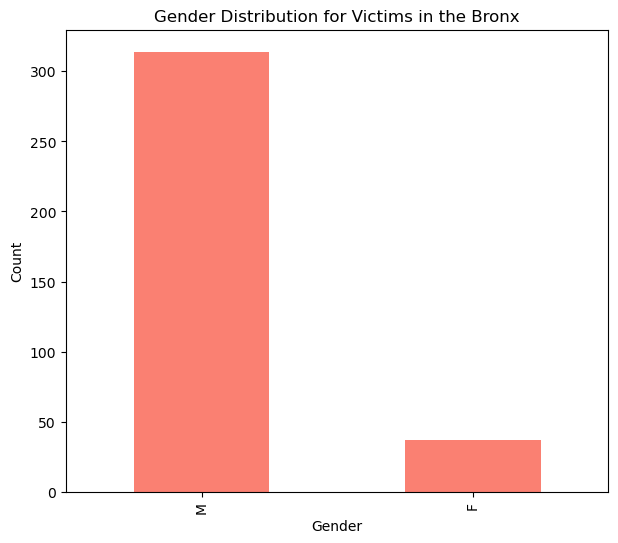

In [40]:
bronx_data = df[df['BORO'] == 'BRONX']
location_column = 'VIC_SEX'
counts = bronx_data[location_column].value_counts()
counts.plot(kind='bar', color='salmon', figsize=(7, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution for Victims in the Bronx')
plt.show()

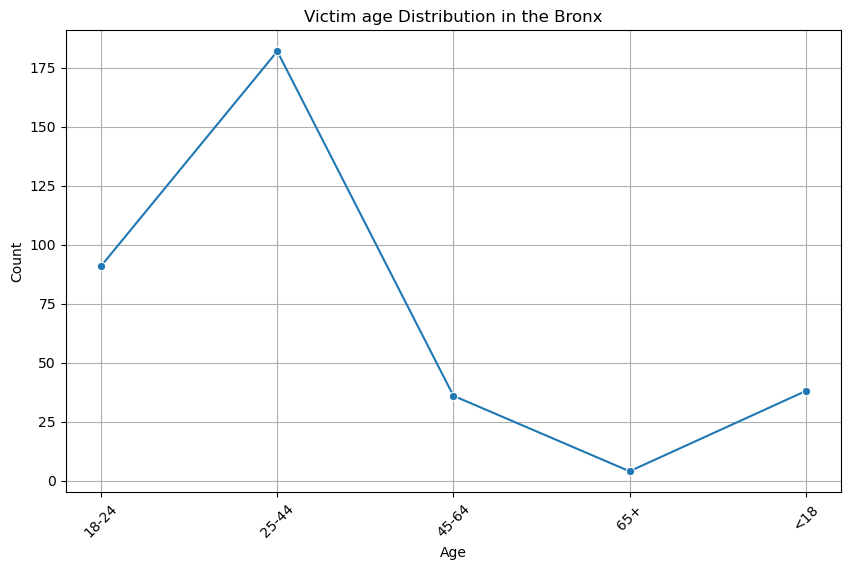

In [48]:
borough_df = df[df['BORO'] == 'BRONX']
age_group_counts = borough_df['VIC_AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_group_counts.index, y=age_group_counts.values, marker='o')
plt.title('Victim age Distribution in the Bronx')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

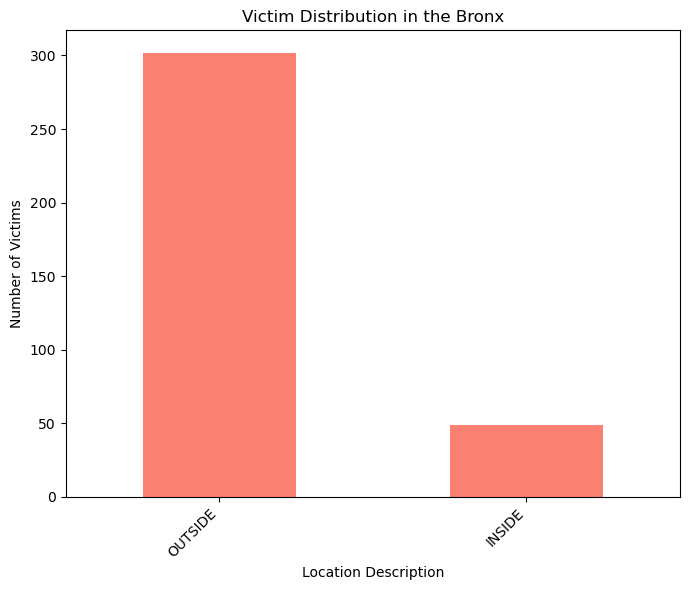

In [72]:
bronx_distribution = df[df['BORO'] == 'BRONX']['LOC_OF_OCCUR_DESC'].value_counts()
plt.figure(figsize=(7, 6))
bronx_distribution.plot(kind='bar', color='salmon')
plt.title('Victim Distribution in the Bronx')
plt.xlabel('Location Description')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

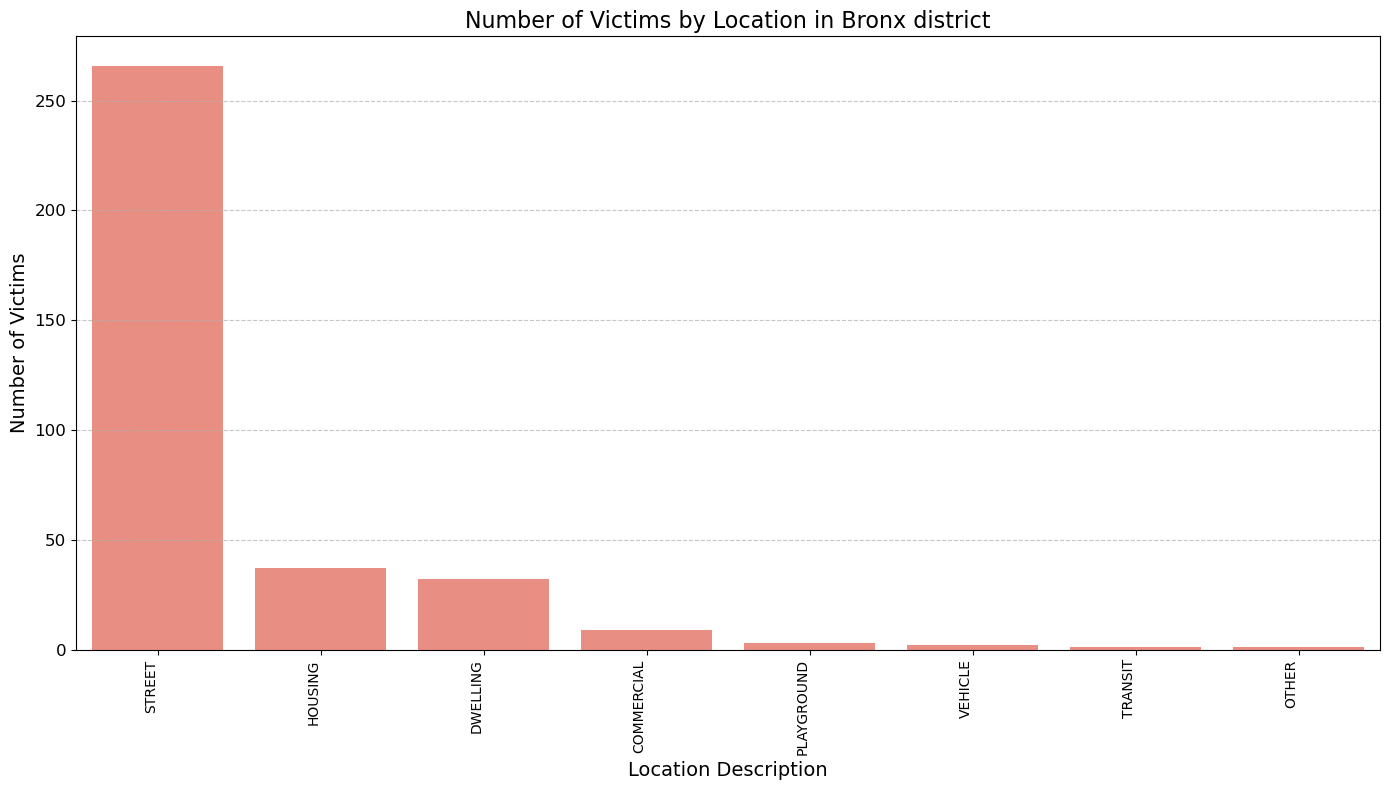

In [104]:
bronx_data = df[df['BORO'] == 'BRONX']
plt.figure(figsize=(14, 8))
sns.countplot(x='LOC_CLASSFCTN_DESC', data=bronx_data, color='salmon', order=bronx_data['LOC_CLASSFCTN_DESC'].value_counts().index)
plt.title('Number of Victims by Location in Bronx district', fontsize=16)
plt.xlabel('Location Description', fontsize=14)
plt.ylabel('Number of Victims', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">Conclusion:</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 35px;">Based on the analysis of the graphs, we can conclude that there is a strong correlation between the demographic profiles of the accused individuals and the identities of the victims.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Race: Black</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Gender: Male</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Age range: 22-44</h1>
<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Area: Outside</h1> 
<h1 style="font-family:'Georgia', sans-serif; font-size: 30px;">Location: Street</h1>
    

<h1 style="font-family:'Georgia', sans-serif; font-size:45px;"> We wanted to see if there was any pattern that influences the gender of the Shooting incidents.</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/WhatsApp%20Image%202024-02-26%20at%2011.55.02.jpeg?raw=true"/>
<div/>          

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;"> Number of victims of shootings by gender.</h1>

In [49]:
count_vic_sex = df["VIC_SEX"].value_counts()
count_vic_sex

M    929
F    140
Name: VIC_SEX, dtype: int64

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;"> Examination of the number of defendants by gender.</h1>

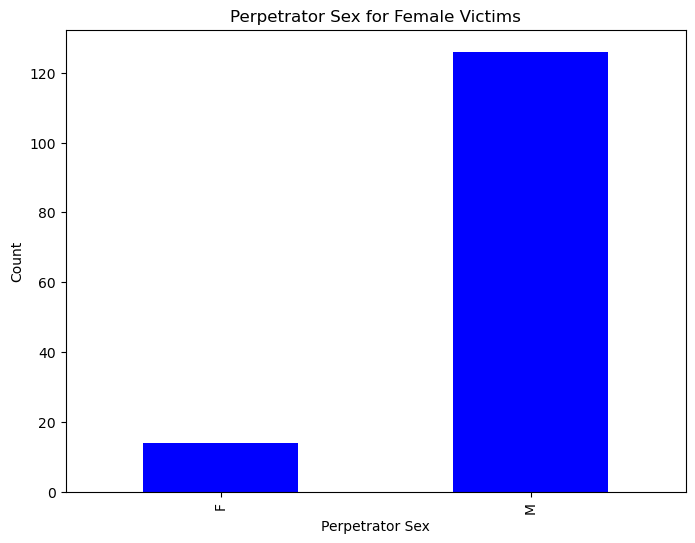

In [50]:
df_female = df[df['VIC_SEX'] == 'F']
perp_sex_column = 'PERP_SEX'
counts = df_female.groupby(perp_sex_column).size()
counts.plot(kind='bar', color='blue', figsize=(8, 6))
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count')
plt.title('Perpetrator Sex for Female Victims')
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;">It is unmistakably evident that the count of accused men significantly surpasses that of women. Such a trend may imply occurrences of domestic violence or relationship tumult preceding these incidents.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;">Check by district where there are the largest number of shootings.</h1>

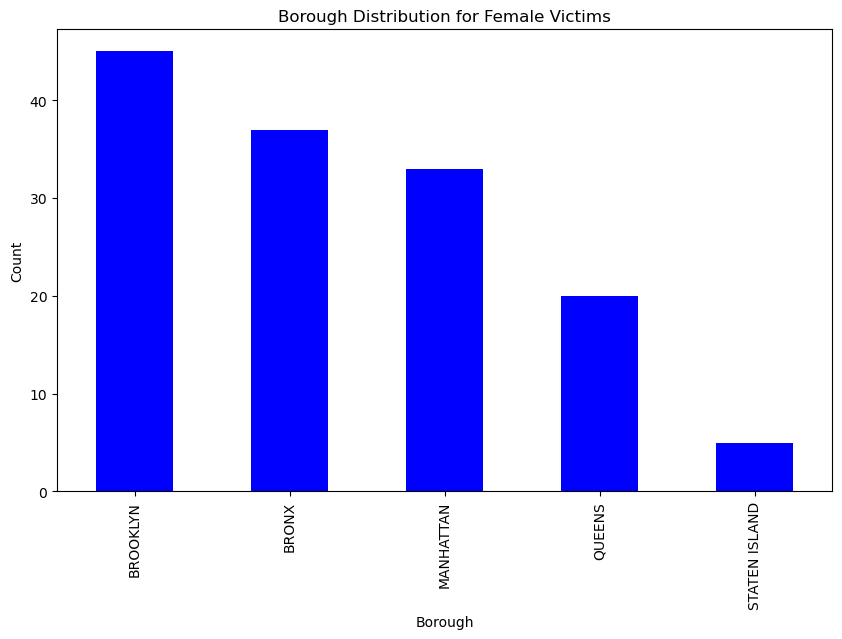

In [55]:
df_female = df[df['VIC_SEX'] == 'F']
location_column = 'BORO'
counts = df_female[location_column].value_counts()
counts.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Borough Distribution for Female Victims')
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;"> It can be seen that most shootings against women take place in Brooklyn and the Bronx, which corresponds with the rest of the data file which are the cities with the largest number of incidents.</h1>

<h1 style="font-family:'Georgia', sans-serif; font-size:35px;">  Now we want to see the amount of shootings that are murders.</h1>

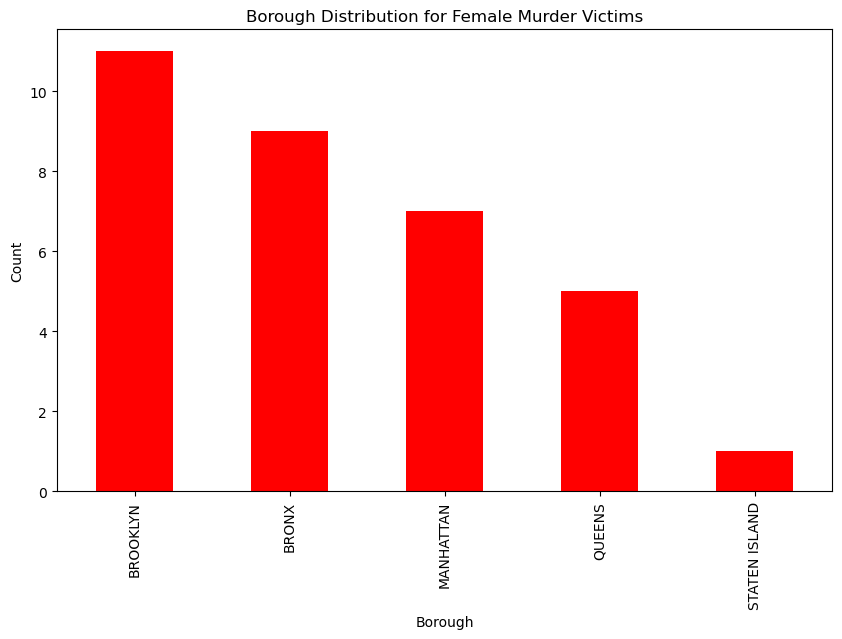

In [56]:
murder_cases = df_female[df_female['STATISTICAL_MURDER_FLAG'] == 'Y']
location_column = 'BORO'
murder_counts = murder_cases[location_column].value_counts()
murder_counts.plot(kind='bar', color='red', figsize=(10, 6))
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Borough Distribution for Female Murder Victims')
plt.show()

<h1 style="font-family:'Georgia', sans-serif; font-size: 45px;">Conclusion:</h1>


<h1 style="font-family:'Georgia', sans-serif; font-size:30px;"> The graph reveals that the majority of shootings targeting women do not result in murder, suggesting that these incidents may not have been premeditated but rather impulsive actions borne out of heated moments. Such occurrences often stem from relational discord between men and women, escalating into conflicts and culminating in these events.</h1>

<div>
<img src="https://github.com/rebeccaelhaj/NYPD-Shooting-/blob/main/photo1708941949.jpeg?raw=true" " width=1000"/>
<div/>